In [20]:
from graph_gen_utils import encode_graph, graph_encodings, gen_save_graphs, \
    generate_graph, draw_graph, edge_encoding, node_encoding, encode_graph
from graph_encoding import node_to_name, node_to_politician,\
    node_to_GoT_characters, node_to_sp_characters, expert

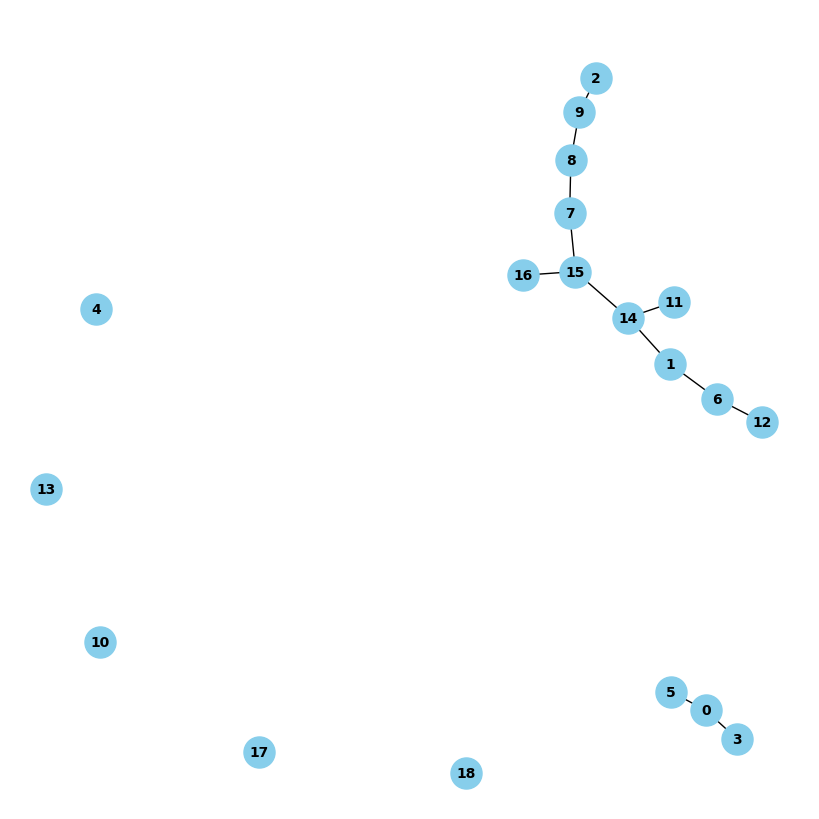

In [22]:
graph_type = 'ER' # Change this to any of the supported types
graph = generate_graph(graph_type)
draw_graph(graph)

In [12]:
print(edge_encoding(graph, 'Parenthesis'))

{(0, 3): '(0, 3)', (0, 7): '(0, 7)', (1, 5): '(1, 5)', (2, 5): '(2, 5)', (4, 8): '(4, 8)', (5, 7): '(5, 7)'}


In [17]:
all_encoding_types = ['Adjacency', 'Politician', 'Incident', 'Friendship',
'Co-authorship', 'SP', 'GOT', 'Social network', 'Expert']
all_graph_types = ['ER', 'BA', 'SBM', 'SFN', 'Path', 'Star', 'Complete']
# ['ER', 'BA', 'WS', 'SF', 'Chung-Lu', 'BA2', 'WS2',
# 'SF2', 'Chung-Lu2']

In [19]:
from itertools import product

In [21]:
len(list(product(all_graph_types, all_encoding_types)))

63

In [7]:
from graphqa import graph_task_generator
from graphqa import graph_task_utils as utils

In [3]:
import tensorflow as tf

In [6]:
data = './data'
task_path = '/tasks'
graph_path = '/graphs'

full_task_path = data + task_path
full_graph_path = data + graph_path

full_task_path, full_graph_path

('./data/tasks', './data/graphs')

In [8]:
algorithms = ['er', 'ba', 'sbm', 'sfn', 'complete', 'star', 'path']
text_encoders = [
'adjacency',
'incident',
'coauthorship',
'friendship',
'south_park',
'got',
'social_network',
'politician',
'expert',
]

graphs = [utils.load_graphs(
          full_graph_path,
          algorithm,
          'test',
      ) for algorithm in algorithms]

In [9]:
generator_algorithms = []
for algorithm in algorithms:
    generator_algorithms += [algorithm] * len(graphs)

7

In [11]:
graphs = []
generator_algorithms = []
for algorithm in algorithms:
    loaded_graphs = utils.load_graphs(
        full_graph_path,
        algorithm,
        'test',
    )
    graphs += loaded_graphs
    generator_algorithms += [algorithm] * len(loaded_graphs)

In [13]:
len(graphs), len(generator_algorithms)

(3500, 3500)

In [18]:
graph_task_generator.TASK_CLASS.keys()

dict_keys(['edge_existence', 'node_degree', 'node_count', 'edge_count', 'connected_nodes', 'cycle_check', 'disconnected_nodes', 'reachability', 'shortest_path', 'maximum_flow', 'triangle_counting', 'node_classification'])